In [1]:
!pip install numpy matplotlib

  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 68.5 MB/s eta 0:00:00
Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl (3.1 MB)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация тестового временного ряда
def generate_time_series(length=1000, noise_level=1, trend_magnitude=30, spike_magnitude=50):
    np.random.seed(421)  # Для повторяемости
    series = np.random.normal(0, noise_level, length)

    # Добавляем событие А (тренд)
    trend_start = np.random.randint(length // 4, length // 2)
    trend_end = trend_start + np.random.randint(20, 50)
    trend_change = np.linspace(0, trend_magnitude, trend_end - trend_start)
    series[trend_start:trend_end] += trend_change
    series[trend_end:] += trend_magnitude

    # Добавляем событие Б (всплеск)
    spike_start = np.random.randint(length // 2, 3 * length // 4)
    spike_peak = spike_start + np.random.randint(5, 10)
    spike_end = spike_peak + np.random.randint(5, 10)
    series[spike_start:spike_peak] += spike_magnitude
    series[spike_peak:spike_end] -= spike_magnitude
    series[spike_end:] += 10  # Y-изменение после всплеска

    return series


In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Анализ временного ряда с использованием скользящих окон
def analyze_series(series, window_size=60, noise_level=10, spike_threshold=3):
    moving_avg = np.convolve(series, np.ones(window_size) / window_size, mode='same')
    moving_std = np.sqrt(np.convolve((series - moving_avg)**2, np.ones(window_size) / window_size, mode='same'))

    events = []

    # Обнаружение события А (тренд)
    gradient = np.gradient(moving_avg)
    trend_start, trend_end = None, None
    for i in range(1, len(gradient)):
        if abs(gradient[i]) > noise_level / window_size:
            if trend_start is None:
                trend_start = i
            trend_end = i
        elif trend_start is not None:
            events.append({
                'type': 'Trend',
                'start': trend_start,
                'end': trend_end,
                'magnitude': moving_avg[trend_end] - moving_avg[trend_start]
            })
            trend_start, trend_end = None, None

    # Обнаружение события Б (всплеск)
    spike_start, spike_peak, spike_end = None, None, None
    for i in range(len(series)):
        if series[i] > moving_avg[i] + spike_threshold * moving_std[i]:
            if spike_start is None:
                spike_start = i
            if spike_peak is None or series[i] > series[spike_peak]:
                spike_peak = i
        elif spike_start is not None:
            spike_end = i
            events.append({
                'type': 'Spike',
                'start': spike_start,
                'peak': spike_peak,
                'end': spike_end,
                'magnitude': series[spike_peak] - moving_avg[spike_start],
                'residual': series[spike_end] - moving_avg[spike_start]
            })
            spike_start, spike_peak, spike_end = None, None, None

    return events

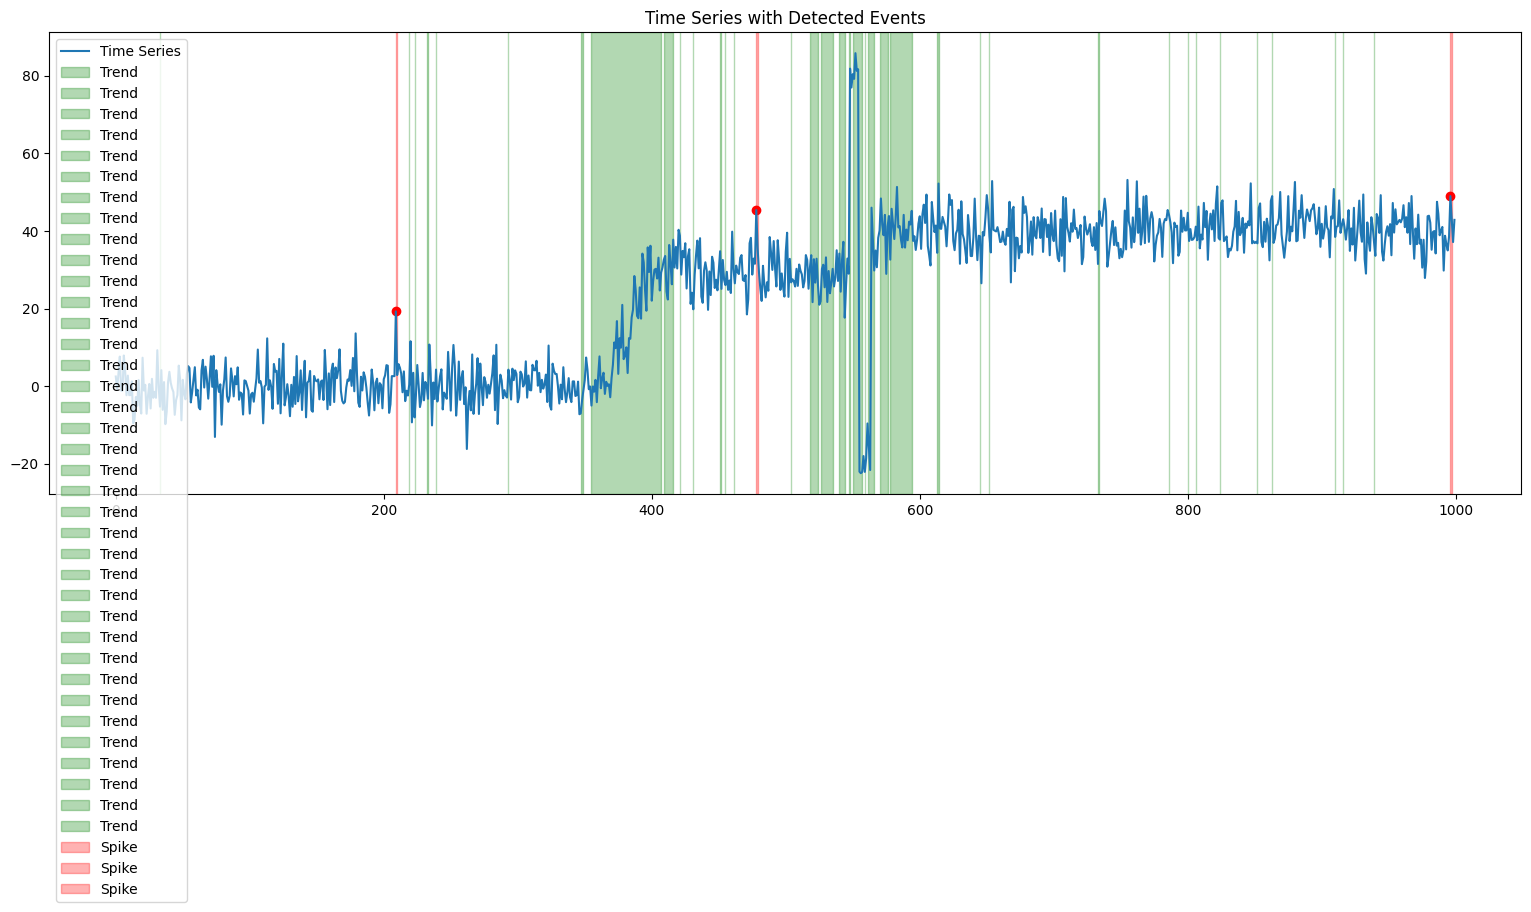

Detected Events:
{'type': 'Trend', 'start': 33, 'end': 33, 'magnitude': np.float64(0.0)}
{'type': 'Trend', 'start': 219, 'end': 219, 'magnitude': np.float64(0.0)}
{'type': 'Trend', 'start': 223, 'end': 223, 'magnitude': np.float64(0.0)}
{'type': 'Trend', 'start': 232, 'end': 233, 'magnitude': np.float64(-0.3603598819370292)}
{'type': 'Trend', 'start': 239, 'end': 239, 'magnitude': np.float64(0.0)}
{'type': 'Trend', 'start': 293, 'end': 293, 'magnitude': np.float64(0.0)}
{'type': 'Trend', 'start': 347, 'end': 349, 'magnitude': np.float64(0.5132704452550865)}
{'type': 'Trend', 'start': 355, 'end': 407, 'magnitude': np.float64(24.4192698145481)}
{'type': 'Trend', 'start': 409, 'end': 416, 'magnitude': np.float64(2.11752219206409)}
{'type': 'Trend', 'start': 421, 'end': 421, 'magnitude': np.float64(0.0)}
{'type': 'Trend', 'start': 431, 'end': 431, 'magnitude': np.float64(0.0)}
{'type': 'Trend', 'start': 451, 'end': 452, 'magnitude': np.float64(-0.22590677358696354)}
{'type': 'Trend', 'star

In [19]:
# Тестирование
if __name__ == "__main__":
    time_series = generate_time_series()
    events = analyze_series(time_series)

    # Визуализация
    plt.figure(figsize=(19, 6))
    plt.plot(time_series, label="Time Series")
    for event in events:
        if event['type'] == 'Trend':
            plt.axvspan(event['start'], event['end'], color='green', alpha=0.3, label='Trend')
        elif event['type'] == 'Spike':
            plt.axvspan(event['start'], event['end'], color='red', alpha=0.3, label='Spike')
            plt.scatter(event['peak'], time_series[event['peak']], color='red')

    plt.legend()
    plt.title("Time Series with Detected Events")
    plt.show()

    print("Detected Events:")
    for event in events:
        print(event)